# ipynb から Word や PDF のファイルを生成する

このページでは iruby notebook の ipynb ファイルから Word や PDF のファイルを (Quarto を用いることで) 生成する方法を説明します。

この変換は論文作成やレポート提出などに役立ちます。

## YAML Front Matter

まず Quarto への入力を想定する ipynb にはその冒頭に、タイプを `Raw` に設定したセルを追加する必要があります(下記画像参照)。

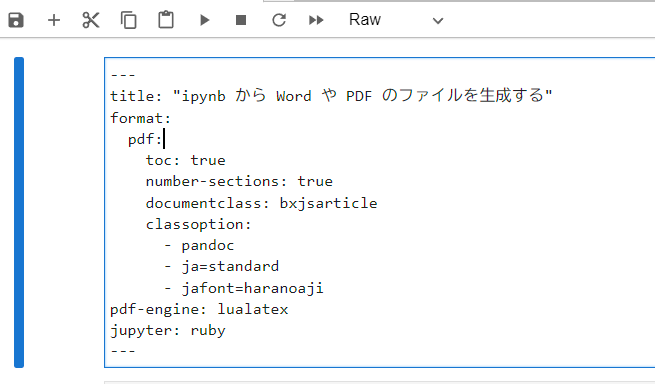

ここでは日本語を含む ipynb を PDF として問題無く出力するための設定を「主に」記述しています。  

その「主に」以外のオプションとしては `toc: true` と `number-sections: true` をここでは含めています。  
`toc: true` は Markdown の header のレベルに応じた目次を自動生成します。  
`number-sections: true` は section に自動で数字インデックスを付与します。
この他にも様々なオプションがあります。  
`pdf:` 用のオプションであれば https://quarto.org/docs/output-formats/pdf-basics.html をご覧ください。

## Ruby コードセルとその出力

まずは何はなくとも Ruby コードセルの作成とその実行結果を ipynb 中に作ってみましょう。

In [1]:
puts "Hello るびー！"

Hello るびー！


日本語を含む文字列のプリントを行う Ruby コードのセルが問題無く実行され、その出力がノートブック中に埋め込まれています。

## ipynb から PDF を出力する

それでは上記のようにコードセルとその実行結果を含む ipynb から PDF を出力してみましょう。

実は JupyterLab には PDF への export 機能があるのですが、その機能では日本語は出力されない難があります。  
また前述の YAML Front Matter 中のオプションのような詳細な設定は行えません。

Quarto を用いるとそのような難は無く、ipynb から PDF を出力することが可能です。
その手順は下記になります。

1. JupyterLab のメニューバー -> File -> New -> Terminal と辿り、Terminal を立ち上げまず。
2. 次のコマンドを実行します。 `quarto render ipynb2pdforword.ipynb`
3. JupyterLab の左のサイドバーの file browser をリフレッシュします。
4. ipynb2pdforword.pdf ができているはずです。それをダブルクリックしてみてください。


## 数式とその式へのクロスリファレンス

ここでは、Quarto が「クロスリファレンス(科学技術出版で必須となるもの)の作成を容易にしてくれること」の入門編として
数式を使ってみます。

数式のレンダリングは Jupyter 中の Markdown セルで標準でサポートされています。  
下記を iruby notebook の Markdown セル中に書き実行してみましょう。

```
## 数式セクション {#sec-equation}

$$
s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2}
$$ {#eq-stddev}
```

上記で行っていることは セクションへのラベリングと数式へのラベリングです。
`{#sec-XXX}` がセクションへのラベリングになります。XXXは任意の名前になります。  
同様に`{#eq-YYY}` は数式へのラベリングになります。

このようにセクションや数式にラベリングを行った上で、`@sec-XXX` のように
`@` の後にラベルをつけた文字列を Markdown セルに記述すると、
Quarto は ipynb から出力する PDF や Word ファイルにセクションや数式へのクロスリファレンスを自動生成してくれます。


## 数式セクション {#sec-equation}

$$
s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2}
$$ {#eq-stddev}


@sec-equation の @eq-stddev を見てください。

上記の文の PDF 出力はどうなっているでしょうか？

「第何セクション」の「第何番目の数式」か、が自動的に参照付けされているはずです。

これが科学技術出版やレポート等で非常に重要となるクロスリファレンスと呼ばれるものになります。

# クロスリファレンスをさらに便利なものとする

Quarto でのクロスリファレンスは上記のセクション、数式だけに留まりません。  
Quarto は図や表を出力するコードセルに対してもクロスリファレンスを生成することができます。  
次はその図表へのクロスリファレンスが iruby notebook でも実現できることを示します。
